In [ ]:
# Import libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [158]:
# Load the dataset
df = pd.read_csv('reviews.csv')  
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    4919 non-null   int64 
 1   Reviews  4918 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.0+ KB


In [ ]:
#Copy the dataframe 
data=df.copy(deep=True)

In [160]:
#Check for missing values
data.isnull().sum()


Index      0
Reviews    1
dtype: int64

In [161]:
# Drop the rows with missing values
data.dropna(subset=['Reviews'], inplace=True)

In [162]:
#Again check for missing values
data.isnull().sum()

Index      0
Reviews    0
dtype: int64

In [163]:
#Check the shape of the dataframe
data.shape

(4918, 2)

In [164]:
#Check the unique values in the 'Reviews' column
data['Reviews'].nunique()

4440

In [165]:
#Print the first 5 rows of the dataset
data.head()

,Index,Reviews
0,1,Alexa cannot hear after she starts playing
1,2,I purchased this as a birthday gift for my 7 y...
2,3,"/*Here I'm Uploading video, enjoy*/Most idioti..."
3,4,Do not buy this product. When i asked alexa t...
4,5,Its just one if the best deal i ever got on am...


In [166]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()
# Create a new column 'Sentiment' to store the sentiment scores
data['Sentiment'] = data['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(data)

      Index                                            Reviews  Sentiment
0         1         Alexa cannot hear after she starts playing     0.2023
1         2  I purchased this as a birthday gift for my 7 y...     0.9753
2         3  /*Here I'm Uploading video, enjoy*/Most idioti...     0.9749
3         4   Do not buy this product. When i asked alexa t...     0.0000
4         5  Its just one if the best deal i ever got on am...     0.9565
...     ...                                                ...        ...
4914   4915                                It's a nice product     0.4215
4915   4916                          Awesome ...i love Alexa..     0.8519
4916   4917  It only listen a sentence of 4 or 5 wordsAnd a...    -0.0752
4917   4918                                  Very good product     0.4927
4918   4919                                         Best thing     0.6369

[4918 rows x 3 columns]


In [167]:
# Create a new column 'Sentiment Label' to categorize the sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
data['Sentiment Label'] = data['Sentiment'].apply(categorize_sentiment)
data.head()

,Index,Reviews,Sentiment,Sentiment Label
0,1,Alexa cannot hear after she starts playing,0.2023,Positive
1,2,I purchased this as a birthday gift for my 7 y...,0.9753,Positive
2,3,"/*Here I'm Uploading video, enjoy*/Most idioti...",0.9749,Positive
3,4,Do not buy this product. When i asked alexa t...,0.0000,Neutral
4,5,Its just one if the best deal i ever got on am...,0.9565,Positive


In [172]:
# Count the sentiment labels in each sentiment category
sentimental_counts = data['Sentiment Label'].value_counts()
print(sentimental_counts)

Sentiment Label
Positive    3534
Negative     795
Neutral      589
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3172\868705422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Label', data=data, palette='Set1')


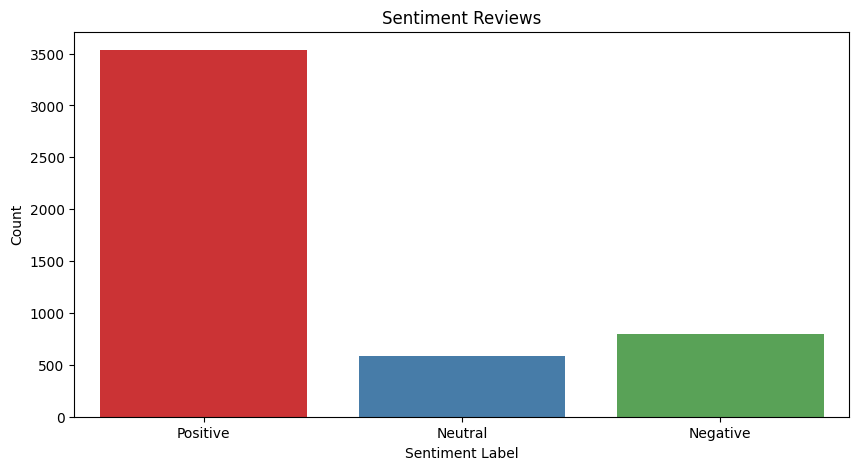

In [169]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment Label', data=data, palette='Set1')
plt.title('Sentiment Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

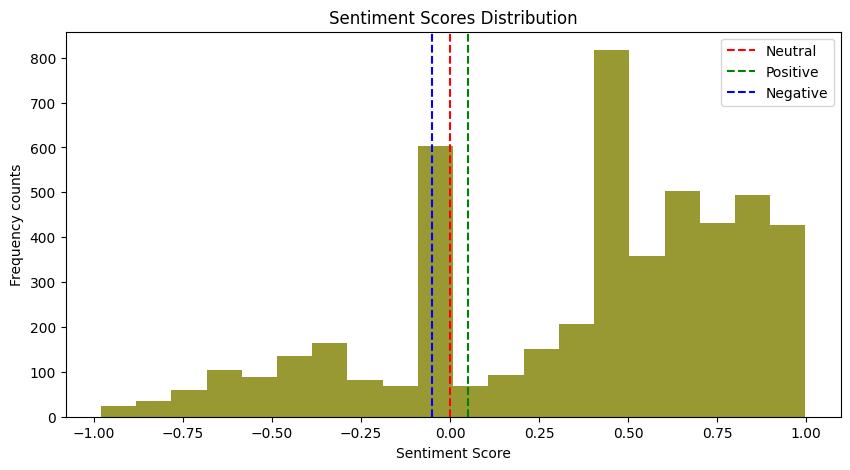

In [170]:
# Plot the sentiment scores
plt.figure(figsize=(10, 5))
plt.hist(data['Sentiment'], bins=20, color='olive', alpha=0.8)
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency counts')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
plt.axvline(x=0.05, color='green', linestyle='--', label='Positive')
plt.axvline(x=-0.05, color='blue', linestyle='--', label='Negative')
plt.legend()
plt.show()


In [173]:
# Save the DataFrame to a new CSV file with sentiment scores and labels
data.to_csv('reviews_with_sentiment.csv', index=False)
print("New csv file is created with sentiment scores and labels")


New csv file is created with sentiment scores and labels
